In [2]:
%matplotlib inline
from matplotlib.pyplot import *

import numpy as np
import scipy as sp
import pandas as pd
from datetime import datetime

import scipy.stats

In [3]:
data = pd.read_csv("^spx_d.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

(648985.5, 741154.5, -0.5421053740691024, 3.6578875425974995)

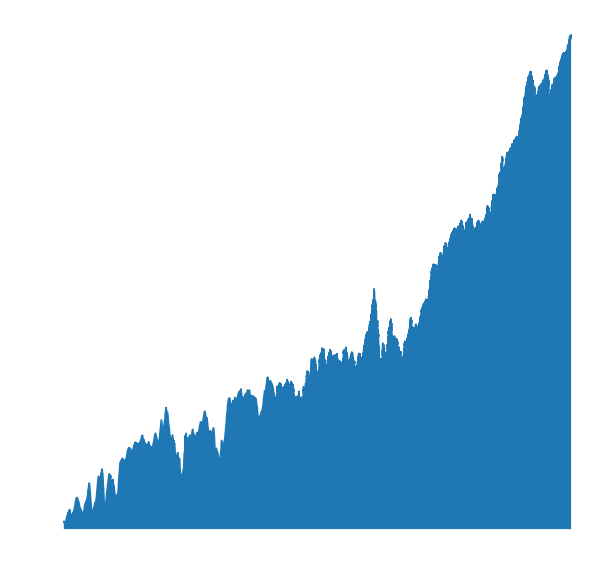

In [4]:
figure(figsize=(10, 10))
plot(np.log10(data.Close))

fill_between(data.index.values, np.log10(np.min(data.Close)/1.1), np.log10(data.Close.values))

axis('off')

# savefig('cover.svg')

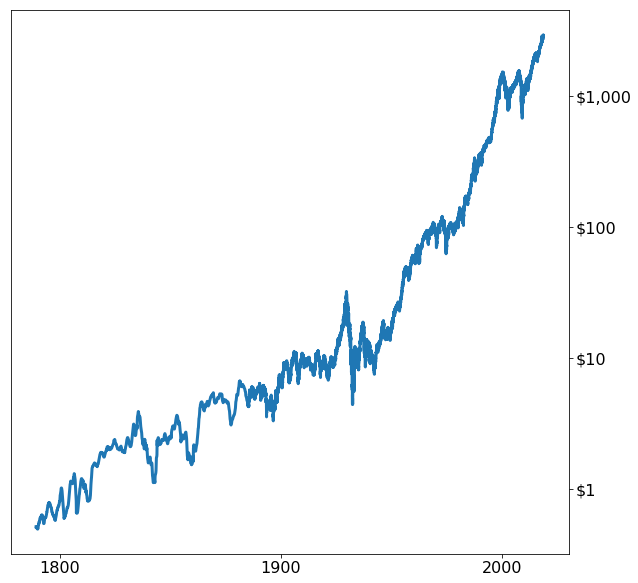

In [49]:
figure(figsize=(10, 10))

plot(np.log10(data.Close), linewidth=3)

ax = gca()

xticks(
    [
    datetime(1800, 1, 1),
    datetime(1900, 1, 1),
    datetime(2000, 1, 1),
    ],
    fontsize=16,
)

ax.yaxis.tick_right()
yt = [0, 1, 2, 3]
yticks(yt, fontsize=16)
ax.set_yticklabels(["${:,.0f}".format(10**t) for t in yt])

savefig('second.svg')

/Users/dradrian/.virtualenvs/misc/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


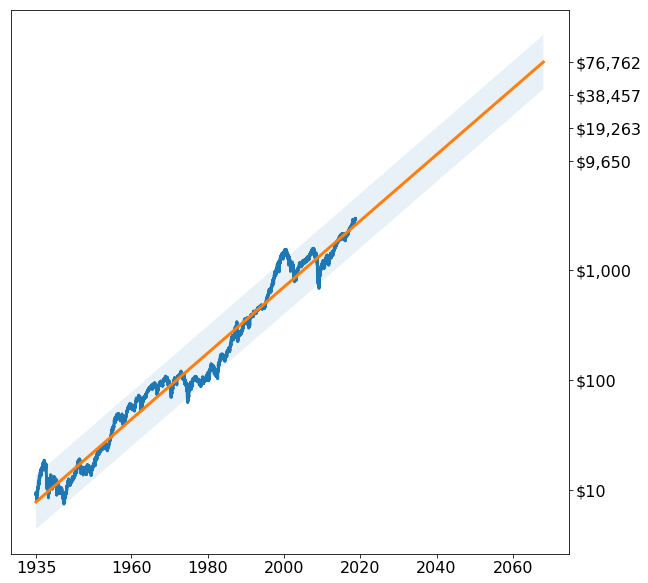

In [171]:
sub = data.copy()
sub = sub[sub.index >= '1935-01-01'][['Close']].dropna()
# sub = sub.resample('Y', how='last')

x = sub.reset_index()['Date'].dt.to_pydatetime()
newx = [
    datetime(2038, 1, 1),
    datetime(2048, 1, 1),
    datetime(2058, 1, 1),
    datetime(2068, 1, 1),
]

xx = np.append(x, newx)

y = np.log10(sub.Close.values)

X = np.hstack([
    np.ones((len(xx), 1)),
    np.array([d.toordinal() for d in xx])[:, None],
#     np.array([d.toordinal()**2 for d in xx])[:, None],
])

w = np.linalg.lstsq(X[:len(y), :], y)[0]
f = np.dot(X, w)
s = np.std(y - f[:len(y)])


figure(figsize=(10, 10))

plot(np.log10(sub.Close), linewidth=3)

plot(xx, f, '-', linewidth=3)

fill_between(xx, f - 2*s, f + 2*s, alpha=0.1, linewidth=0)

ax = gca()

xticks(
    [
    datetime(1935, 1, 1),
#     datetime(1950, 1, 1),
    datetime(1960, 1, 1),
    datetime(1980, 1, 1),
    datetime(2000, 1, 1),
    datetime(2020, 1, 1),
    datetime(2040, 1, 1),
    datetime(2060, 1, 1),
    ],
    fontsize=16,
)

ax.yaxis.tick_right()
yt = [1, 2, 3] + list(f[-len(newx):])
yticks(yt, fontsize=16)
ax.set_yticklabels(["${:,.0f}".format(10**t) for t in yt]);



savefig('third.svg')

/Users/dradrian/.virtualenvs/misc/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  This is separate from the ipykernel package so we can avoid doing imports until


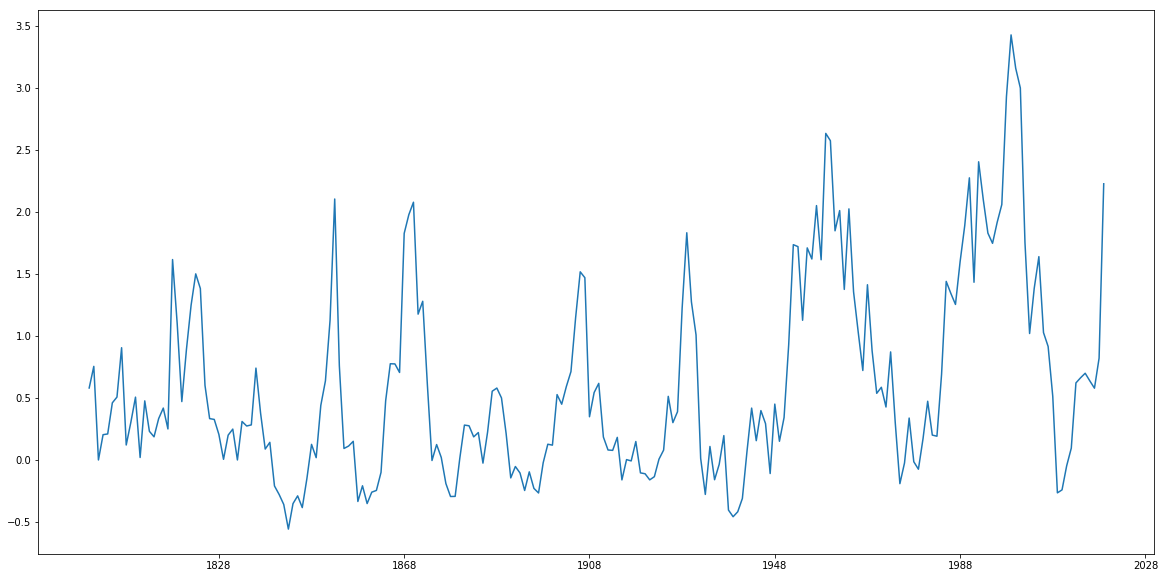

In [130]:
sub = data.copy()
# sub = sub[sub.index >= '1918-01-01'][['Close']].dropna()
sub = sub.resample('Y', how='last')


figure(figsize=(20, 10))


# days = 20
# rets = (sub.Close.values[days:] - sub.Close.values[:-days]) /  sub.Close.values[:-days]
# plot(sub.index[-len(rets):], rets)

# days = 30
# rets = (sub.Close.values[days:] - sub.Close.values[:-days]) /  sub.Close.values[:-days]
# plot(sub.index[-len(rets):], rets)

# days = 40
# rets = (sub.Close.values[days:] - sub.Close.values[:-days]) /  sub.Close.values[:-days]
# plot(sub.index[-len(rets):], rets)

days = 10
rets = (sub.Close.values[days:] - sub.Close.values[:-days]) /  sub.Close.values[:-days]
plot(sub.index[-len(rets):], rets)